This is pbaylies' StyleGAN Encoder and tutorial, ported to StyleGAN 2.
  
 * Note: make sure you're using the GPU runtime for this - see Runtime -> Change Runtime Type in Google Colab

In [1]:
!pip install --force tqdm==4.24.0

     |████████████████████████████████| 51kB 1.7MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1


First, clone the repo:

In [1]:
!git clone https://github.com/robertluxemburg/stylegan2encoder
%cd stylegan2encoder

Cloning into 'stylegan2encoder'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 104 (delta 1), reused 22 (delta 1), pack-reused 80
Receiving objects: 100% (104/104), 1.22 MiB | 1.34 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/stylegan2encoder


TODO: Optionally, try training a ResNet of your own if you like; this could take a while. Remember, there's a pre-trained model linked in the repo that works with the FFHQ faces StyleGAN model)

In [0]:
#!python train_resnet.py --help
#!python train_resnet.py --test_size 256 --batch_size 1024 --loop 1 --max_patience 1

Next, let's get some test images to work with... These are from Pexels, which has free stock photos.

In [3]:
!mkdir aligned_images raw_images
!wget -O raw_images/stock_photo1.jpg 'https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536'
!wget -O raw_images/stock_photo2.jpg 'https://images.pexels.com/photos/1445467/pexels-photo-1445467.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536'

mkdir: cannot create directory ‘aligned_images’: File exists
mkdir: cannot create directory ‘raw_images’: File exists
--2019-12-26 18:38:37--  https://images.pexels.com/photos/614810/pexels-photo-614810.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536
Resolving images.pexels.com (images.pexels.com)... 104.17.208.102, 104.17.209.102, 2606:4700::6811:d166, ...
Connecting to images.pexels.com (images.pexels.com)|104.17.208.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 753421 (736K) [image/jpeg]
Saving to: ‘raw_images/stock_photo.jpg’

raw_images/stock_ph 100%[===================>] 735.76K  --.-KB/s    in 0.01s   

2019-12-26 18:38:37 (60.3 MB/s) - ‘raw_images/stock_photo.jpg’ saved [753421/753421]

--2019-12-26 18:38:38--  https://images.pexels.com/photos/1445467/pexels-photo-1445467.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=1536&w=1536
Resolving images.pexels.com (images.pexels.com)... 104.17.208.102, 104.17.209.102, 2606:4700::6811:d166, ...
Connecting to 

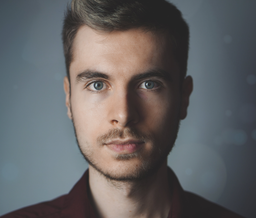

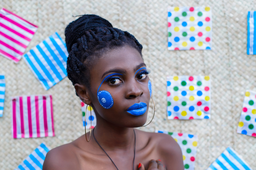

In [4]:
import PIL.Image
img1 = PIL.Image.open('raw_images/stock_photo1.jpg')
wpercent = (256/float(img1.size[0]))
hsize = int((float(img1.size[1])*float(wpercent)))
img1 = img1.resize((256,hsize), PIL.Image.LANCZOS)
img2 = PIL.Image.open('raw_images/stock_photo2.jpg')
wpercent = (256/float(img2.size[0]))
hsize = int((float(img2.size[1])*float(wpercent)))
img2 = img2.resize((256,hsize), PIL.Image.LANCZOS)
display(img1,img2)

Now we need to get just the faces, cropped and aligned... fortunately, there's already a script for this!

In [19]:
!python align_images.py raw_images/ aligned_images/

Using TensorFlow backend.


--2019-12-26 19:09:30--  https://rolux.org/media/stylegan/23.jpg
Resolving rolux.org (rolux.org)... 138.201.70.161
Connecting to rolux.org (rolux.org)|138.201.70.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102878 (100K) [image/jpeg]
Saving to: ‘aligned_images/23.jpg’

aligned_images/23.j 100%[===================>] 100.47K   125KB/s    in 0.8s    

2019-12-26 19:09:32 (125 KB/s) - ‘aligned_images/23.jpg’ saved [102878/102878]



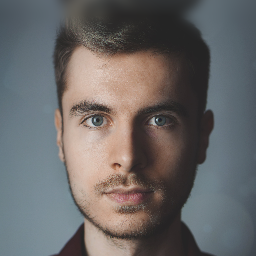

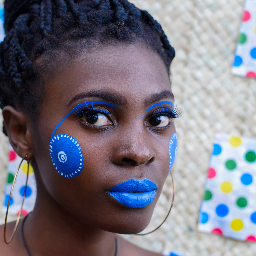

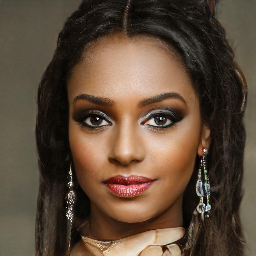

In [20]:
# Add one more (pre-aligned) image.
!wget -O aligned_images/23.jpg https://rolux.org/media/stylegan/23.jpg

display(PIL.Image.open('aligned_images/stock_photo1_01.png').resize((256,256)))
display(PIL.Image.open('aligned_images/stock_photo2_01.png').resize((256,256)))
display(PIL.Image.open('aligned_images/23.jpg').resize((256,256)))

Finally, let's try encoding some images into a latent representation! That's what you came here for, right? Let's just do a quick encoding, and see how we do...

In [21]:
!python encode_images.py aligned_images/ generated_images/ latent_representations/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --batch_size=2


Using TensorFlow backend.
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
  0% 0/1 [00:00<?, ?it/s]Saving mask masks/23.jpg
Saving mask masks/stock_photo1_01.png
Loading mask masks/23.jpg
Loading mask masks/stock_photo1_01.png

  0% 0/100 [00:00<?, ?it/s]
23 stock_photo1_01: loss 228.9485; lr 0.2500:   0% 0/100 [00:10<?, ?it/s]
23 stock_photo1_01: loss 228.9485; lr 0.2500:   1% 1/100 [00:11<18:34, 11.26s/it]
23 stock_photo1_01: loss 216.7479; lr 0.2500:   1% 1/100 [00:11<19:31, 11.84s/it]
23 stock_photo1_01: loss 216.7479; lr 0.2500:   2% 2/100 [00:11<09:40,  5.92s/it]
23 stock_photo1_01: loss 205.8935; lr 0.2500:   2% 2/100 [00:12<10:08,  6.21s/it]
23 stock_photo1_01: loss 205.8935; lr 0.2500:   3% 3/100 [00:12<06:41,  4.14s/it]
23 stock_photo1_01: loss 194.4739; lr 0.2250:   3% 3/100 [00:12<07:00,  4.33s/it]
23 stock_photo1_01: loss 194.4739; lr 0.2250:   4% 4/100 [00:1

Ok, let's see how we did! Note the paths above, the generated image is in the generated_images folder, the latent representation is in the latent_representations folder, and since we generated videos of the training process, by default those are in the videos folder.

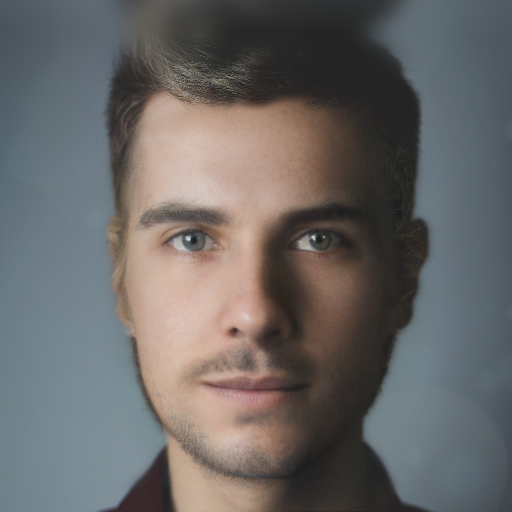

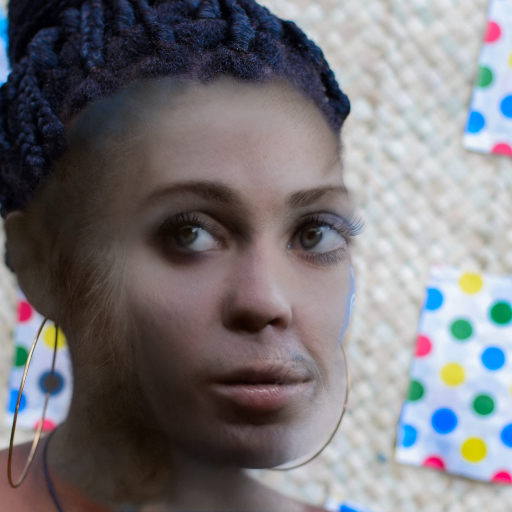

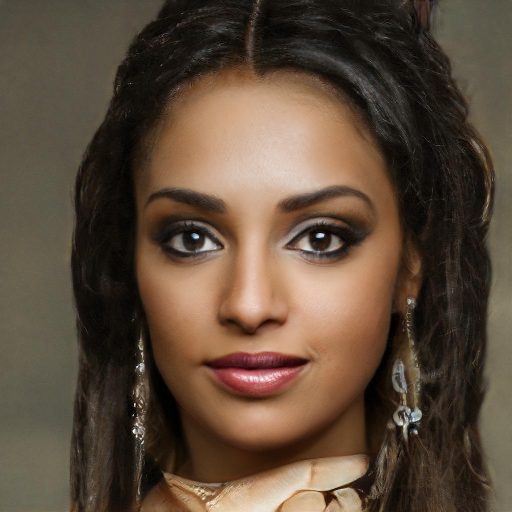

In [22]:
display(PIL.Image.open('generated_images/stock_photo1_01.png').resize((512, 512)))
display(PIL.Image.open('generated_images/stock_photo2_01.png').resize((512, 512)))
display(PIL.Image.open('generated_images/23.png').resize((512, 512)))

Great job, everybody, nailed it! ... wait, what's that you say, the second image doesn't quite look the same? Hmm... let's try to do a better job, shall we?

In [28]:
!mv aligned_images/stock_photo1_01.png aligned_images/_stock_photo1_01.png
!mv generated_images/stock_photo2_01.png generated_images/_stock_photo2_01.png
!mv generated_images/23.png generated_images/_23.png

!python encode_images.py aligned_images/ generated_images/ latent_representations/ \
    --vgg_url=https://rolux.org/media/stylegan/vgg16_zhang_perceptual.pkl \
    --lr=0.25 --iterations=1000 --use_l1_penalty=0.5

mv: cannot stat 'aligned_images/stock_photo1_01.png': No such file or directory
Using TensorFlow backend.
Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.
  0% 0/2 [00:00<?, ?it/s]Loading mask masks/23.jpg
Loading mask masks/23.jpg

  0% 0/1000 [00:00<?, ?it/s]
23: loss 237.1647; lr 0.2500:   0% 0/1000 [00:07<?, ?it/s]
23: loss 237.1647; lr 0.2500:   0% 1/1000 [00:08<2:14:57,  8.11s/it]
23: loss 222.2838; lr 0.2500:   0% 1/1000 [00:08<2:20:05,  8.41s/it]
23: loss 222.2838; lr 0.2500:   0% 2/1000 [00:08<1:09:59,  4.21s/it]
23: loss 209.5899; lr 0.2500:   0% 2/1000 [00:08<1:12:33,  4.36s/it]
23: loss 209.5899; lr 0.2500:   0% 3/1000 [00:08<48:20,  2.91s/it]  
23: loss 195.3615; lr 0.2500:   0% 3/1000 [00:09<50:03,  3.01s/it]
23: loss 195.3615; lr 0.2500:   0% 4/1000 [00:09<37:30,  2.26s/it]
23: loss 182.3046; lr 0.2500:   0% 4/1000 [00:09<38:47,  2.34s/it]
23: loss 182.3046;

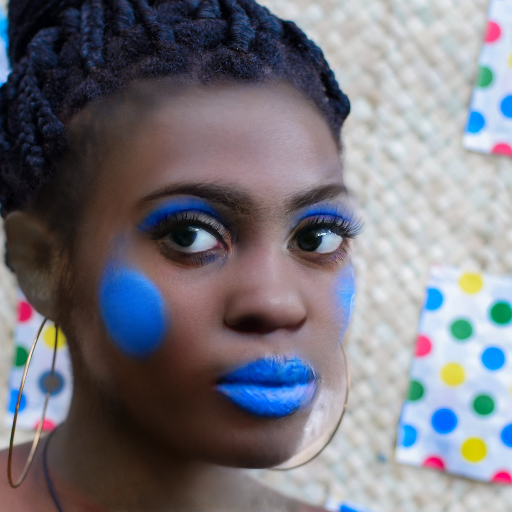

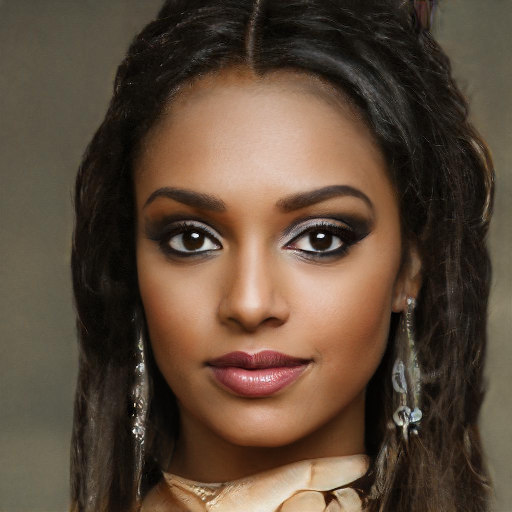

In [29]:
display(PIL.Image.open('generated_images/stock_photo2_01.png').resize((512, 512)))
display(PIL.Image.open('generated_images/23.png').resize((512, 512)))


When in doubt, mess with the parameters... here, we ~lowered the l1 penalty on the dlatents, to allow for greater variation outside of what StyleGAN knows well, and we've lowered the learning rate and~ raised the number of iterations~, to allow for more gradual changes~. See more options below:

In [15]:
!python encode_images.py --help

Using TensorFlow backend.
usage: encode_images.py [-h] [--data_dir DATA_DIR] [--mask_dir MASK_DIR]
                        [--load_last LOAD_LAST] [--dlatent_avg DLATENT_AVG]
                        [--model_url MODEL_URL] [--model_res MODEL_RES]
                        [--batch_size BATCH_SIZE] [--optimizer OPTIMIZER]
                        [--vgg_url VGG_URL] [--image_size IMAGE_SIZE]
                        [--resnet_image_size RESNET_IMAGE_SIZE] [--lr LR]
                        [--decay_rate DECAY_RATE] [--iterations ITERATIONS]
                        [--decay_steps DECAY_STEPS]
                        [--early_stopping [EARLY_STOPPING]]
                        [--early_stopping_threshold EARLY_STOPPING_THRESHOLD]
                        [--early_stopping_patience EARLY_STOPPING_PATIENCE]
                        [--load_effnet LOAD_EFFNET]
                        [--load_resnet LOAD_RESNET]
                        [--use_preprocess_input [USE_PREPROCESS_INPUT]]
                 

## ~ Here Be Dragons ~

Ok, that's nice, but what to do with the latents? Well, I'm glad you asked, let's see what we can do with the two latent representations we now have to rub together...

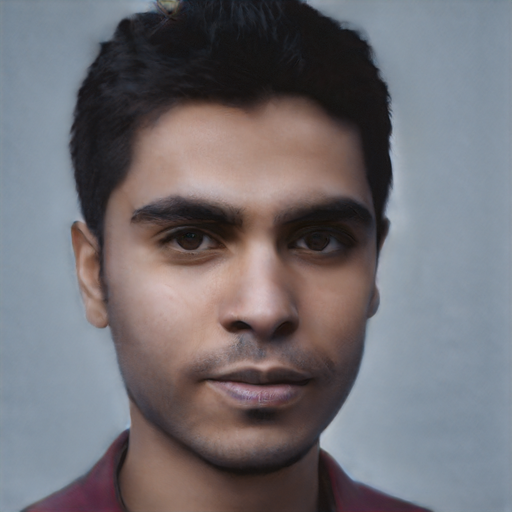

In [0]:
import numpy as np
import config
import dnnlib
import dnnlib.tflib as tflib
import pickle
import PIL.Image
# load the StyleGAN model into Colab
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)
# load the latents
s1 = np.load('latent_representations/stock_photo_01.npy')
s2 = np.load('latent_representations/stock_photo2_01.npy')
s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)
# combine the latents somehow... let's try an average:
savg = 0.5*(s1+s2)
# run the generator network to render the latents:
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
images = Gs_network.components.synthesis.run(savg, randomize_noise=False, **synthesis_kwargs)
display(PIL.Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').resize((512,512),PIL.Image.LANCZOS))

Ok, that looks complicated. Can we do it again, but simpler? Sure. (Restart the runtime if it gives you trouble...)

Instructions for updating:
Colocations handled automatically by placer.


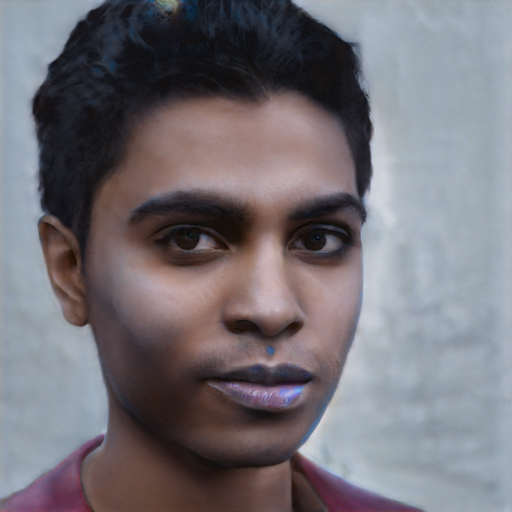

In [0]:
import math
import pickle
import PIL.Image
import numpy as np
import config
import dnnlib
import dnnlib.tflib as tflib
from encoder.generator_model import Generator
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

model_res = 1024
model_scale = int(2*(math.log(model_res,2)-1))

def generate_raw_image(latent_vector):
    latent_vector = latent_vector.reshape((1, model_scale, 512))
    generator.set_dlatents(latent_vector)
    return generator.generate_images()[0]

def generate_image(latent_vector):
    img_array = generate_raw_image(latent_vector)
    img = PIL.Image.fromarray(img_array, 'RGB')
    return img

s1 = np.load('latent_representations/stock_photo_01.npy')
s2 = np.load('latent_representations/stock_photo2_01.npy')
s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)

display(generate_image(0.3*s1+0.7*s2).resize((512,512),PIL.Image.LANCZOS))

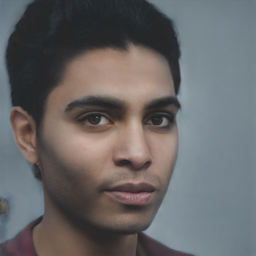

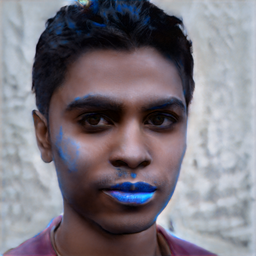

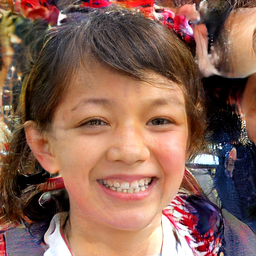

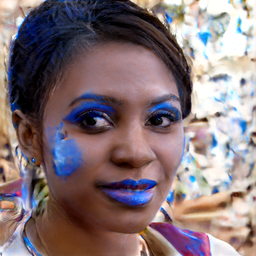

In [0]:
# more stupid latent tricks
lr = ((np.arange(1,model_scale+1)/model_scale)**0.75).reshape((model_scale,1))
rl = 1-lr
display(generate_image(lr*s1+rl*s2).resize((256,256),PIL.Image.LANCZOS))

lr = ((np.arange(1,model_scale+1)/model_scale)**0.25).reshape((model_scale,1))
rl = 1-lr
display(generate_image(lr*s2+rl*s1).resize((256,256),PIL.Image.LANCZOS))

display(generate_image(-0.5*s1).resize((256,256),PIL.Image.LANCZOS))
display(generate_image(-0.5*s1+(lr*s2+rl*s1)).resize((256,256),PIL.Image.LANCZOS))